# P1: MLE for uniform distribution

Scores of A+ Students: [92; 95:8; 91:3; 94:1; 90:9]

Let X be a Random Variable corresponding to scores of A+ student group.

With given assumption of uniform distribution for the A+ student group:


$$
P(X=x) = \left\{
\begin{array}{cc}
\frac{1}{b - a} & if a<=x<=b \\
0 & \textrm{otherwise}.
\end{array}
\right.
$$

##### Point-2 Estimate the parameters b and a that maximize the likelihood of observing the five data samples you collected
#### Maximum likelihood Estimation:

$$\arg max_{b,a} \prod_{i} P(X=x_{i}) = \arg max_{b,a} \prod_{i} \frac{1}{b - a}$$ 

$$ = \arg max_{b,a} ( \frac{1}{b - a})^{5} $$

Above equation is maximum when **b-a** is minimum and with all five given scores in between **a** and **b**.

So, **a** should be the least score and **b** be the highest score in the given set.

$$\therefore a = 90.9  \\ b = 95.8 $$


##### Point-3 Adjust your  parameters b and a values for the A+ students, if they are integer multiples of 5 rather than a real-valued boundary. 

For this we need to find a combination of a,b that maximizes the likelihood and are multiples of 5.

So, **a** should be **90** and **b** be **100** with **b-a = 10**. And ranges anything other than that would result in a less likelihood or not fully covering given samples.

**Comparision with other choices of (b,a)**

Case-1: if **a = 90 and b=95** then sample **95.8** will not be in the range even though b-a=5 is less than proposed solution with b-a =10. 

Case-2: if **a** is less than **90**  and b takes any value in the range [100,Maximum Marks] then b-a will be greater than 10 with less likelihood than when a=90 and b=100

$$\therefore a = 90  \\ b = 100 $$


# P2: Central Limit Theorem

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Function to Load the image and Vectorize
def load_image_vector(image_name):
    """
    Args:
    image_name: Name of the Image
    
    returns:
    luddy_vector: Vectorized 1-D array of Image 
    """
    image_path = image_name+".jpeg"
    luddy_input = Image.open(image_path)
    luddy_array = np.array(luddy_input.convert('RGB'))
    luddy_vector = luddy_array.flatten()
    
    return luddy_vector

In [3]:
#Point-3 Loading the images and Vectorizing 

luddy1_vector = load_image_vector("luddy1")
luddy2_vector = load_image_vector("luddy2")
luddy3_vector = load_image_vector("luddy3")


#### Histogram of original luddy1 image 

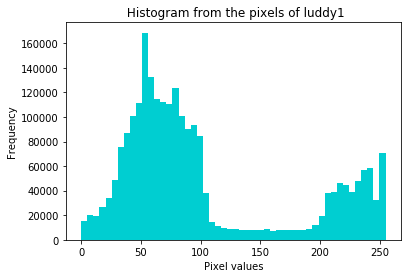

In [4]:
#Point-4 Histogram from the pixels of luddy1.jpeg.
plt.hist(luddy1_vector, color = "darkturquoise", bins=50)
plt.title(' Histogram from the pixels of luddy1')
plt.xlabel('Pixel values')
plt.ylabel('Frequency')
plt.show()

Above Histogram of luddy1 image has multiple peaks. So, it's a multimodal distribution

In [5]:
#Point-7 Standardizing the vectorized images by subtracting their sample means and by dividing by their sample sd.
luddy1_Standard = (luddy1_vector - np.mean(luddy1_vector))/np.std(luddy1_vector)
luddy2_Standard = (luddy2_vector - np.mean(luddy2_vector))/np.std(luddy2_vector)
luddy3_Standard = (luddy3_vector - np.mean(luddy3_vector))/np.std(luddy3_vector)

$$ \kappa= E(x^{5}) - 3 $$

#### Calculation of  kurtosis values for all 3 standarized images 

In [6]:
#Point-8 Calculate the kurtosis for standarized images 
K_luddy1 = np.mean(np.power(luddy1_Standard,4))-3
print("Kurtosis Value for luddy1 is ",K_luddy1)
K_luddy2 = np.mean(np.power(luddy2_Standard,4))-3
print("Kurtosis Value for luddy2 is ",K_luddy2)
K_luddy3 = np.mean(np.power(luddy3_Standard,4))-3
print("Kurtosis Value for luddy3 is ",K_luddy3)


Kurtosis Value for luddy1 is  -0.5594396228432177
Kurtosis Value for luddy2 is  -0.9183061116484668
Kurtosis Value for luddy3 is  -0.8406916696674505


**Kurtosis is a measure of whether the data is heavy tailed or light tailed with respect to a normal distribution. And more Gaussian it is then lower the Kurtosis value will be.**

**So, Image luddy1 with Kurtosis Value ~ -0.56 is less Gaussian-like.**






#### Histograms of all 3  Standardized images 

Luddy1


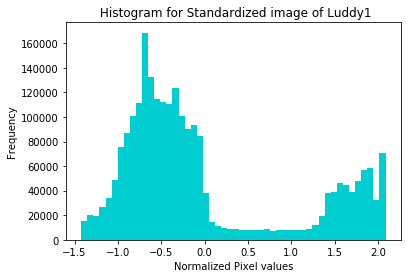

In [7]:
#Point-8 Histogram of Standardized image of Luddy1
print('\033[1m' +"Luddy1")
plt.hist(luddy1_Standard, color = "darkturquoise", bins=50)
plt.title(' Histogram for Standardized image of Luddy1')
plt.xlabel('Normalized Pixel values')
plt.ylabel('Frequency')
plt.show()

Luddy2


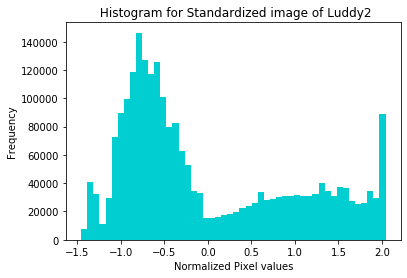

In [8]:
#Point-8 Histogram of Standardized image of Luddy2
print('\033[1m' +"Luddy2")
plt.hist(luddy2_Standard, color = "darkturquoise", bins=50)
plt.title(' Histogram for Standardized image of Luddy2')
plt.xlabel('Normalized Pixel values')
plt.ylabel('Frequency')
plt.show()

Luddy3


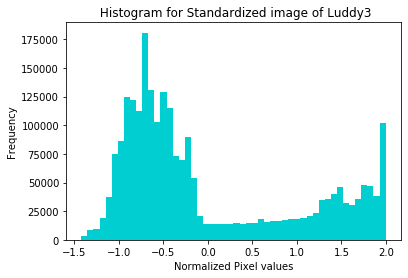

In [9]:
#Point-8 Histogram of Standardized image of Luddy3
print('\033[1m' +"Luddy3")
plt.hist(luddy3_Standard, color = "darkturquoise", bins=50)
plt.title(' Histogram for Standardized image of Luddy3')
plt.xlabel('Normalized Pixel values')
plt.ylabel('Frequency')
plt.show()

#### From the above 3 graphs, we can see that  graph of luddy1 looks like a bimodal  and is relatively less gaussian than other two.

**we can see that blury images w.r.t sharp images  are more gaussian like and have low kurtosis values.**

**So, image luddy1 with highest kurtosis value ~ -0.56 is the sharpest and image luddy2 with lowest kurtosis value ~ -0.92 is the most shaken one amoung 3 given images.**

## P3: Gradient Ascent for Eigendecomposition

In [10]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np

In [11]:
#Point-2 Reading data
data = loadmat('X.mat')
X = data.get("X")
X.shape

(2, 1000)

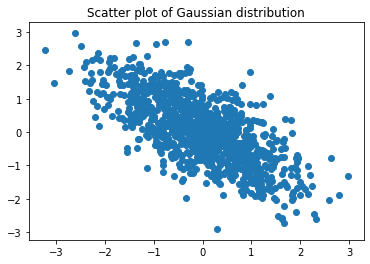

In [12]:
#Point-3 Creating Scatter plot of Gaussian distribution
plt.scatter(X[0], X[1])
plt.title('Scatter plot of Gaussian distribution')
plt.show()

Above plot is similar to football-shaped distribution.

In [13]:
#Point-4 Initializing first eigen vector with Random samples from a standard normal distribution 
W1 = np.asmatrix(np.random.normal(0, 1, 2)).T
W1.shape

(2, 1)

In [14]:
print("L2-Norm of W1 before Normalization")
np.sqrt(np.sum(np.square(W1)))

L2-Norm of W1 before Normalization


1.6705416163769495

In [15]:
#Point-5 Normalizing W1
print("L2-Norm of W1 after Normalization")
W1 =  W1/np.sqrt(np.sum(np.square(W1)))
np.sqrt(np.sum(np.square(W1)))

L2-Norm of W1 after Normalization


0.9999999999999999

Projection of Data samples(X) onto W1
$$ z = ((W_{1})^{T}X) $$

In [16]:
#Point-6 Projection of Data samples(X) onto W1

z1 = np.matmul(W1.T,X)
z1.shape

(1, 1000)

Eigenvalue:

$$ Lamda_{1} = W_{1}^{T}XX^{T}W_{1} $$

In [17]:
#Point-7 Trying to find highest eigen value
lamda1 =np.matmul(z1,z1.T).item()

**Derivative of lamda1 w.r.t w1**

$$\displaystyle \frac{\delta  lamda_{1}}{\delta W_{1}} = XX^{T}W_{1} + XX^{T}W_{1}$$

In [18]:

delta=pow(10,2)
while delta >= pow(10,-10):
    #Step-8 Derivative of L1 w.r.t w1
    lamda1_Deriv = 2*np.matmul(np.matmul(X,X.T),W1)

    #step-9 update your parameter.
    alpha = 0.0001
    W1 = W1 + alpha*lamda1_Deriv

    #Point-10 normalization
    #print("L2-Norm of W1 after Normalization")
    W1 =  W1/np.sqrt(np.sum(np.square(W1)))
    
    z1 = np.matmul(W1.T,X)
    delta = np.abs(np.matmul(z1,z1.T).item()-lamda1)
    lamda1 = np.matmul(z1,z1.T).item()
print("First Eigen Value lamda1:", lamda1)
print("First Eigen Vector W1:",np.asarray(W1).reshape(-1))

First Eigen Value lamda1: 1658.5883302530417
First Eigen Vector W1: [-0.70593254  0.70827907]


In [19]:
#Point-12 subtracting the contribution of the first eigenvector from X
s1 =np.sqrt(np.sum(np.square(np.matmul(W1.T,X))))
u1 = np.matmul(X.T,W1)/s1
X_revised = X-np.asarray(np.matmul(np.matmul(W1,np.asmatrix(s1)),u1.T))

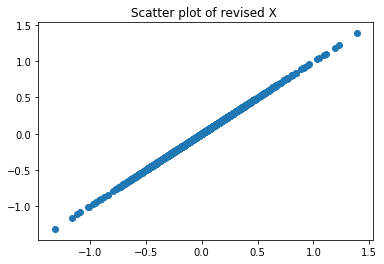

In [20]:
#Point-12 Creating Scatter plot of revised X after subtracting the contribution of the first eigenvector
plt.scatter(X_revised[0], X_revised[1])
plt.title('Scatter plot of revised X ')
plt.show()

In [21]:
#Point-13 finding second eigen vector
W2 = np.asmatrix(np.random.normal(0, 1, 2)).T
W2 =  W2/np.sqrt(np.sum(np.square(W2)))
z2 = np.matmul(W2.T,X_revised)
lamda2 =np.matmul(z2,z2.T).item()
delta=pow(10,2)
while delta >= pow(10,-10):
    #Point-8 Derivative of Lamda2 w.r.t W2
    # Need to write formulae of derivatibe in markdown
    lamda2_Deriv = 2*np.matmul(np.matmul(X_revised,X_revised.T),W2)

    #Point-9 update your parameter.
    alpha = 0.0001
    W2 = W2 + alpha*lamda2_Deriv

    #Point-10 normalization
    #print("L2-Norm of W2 after Normalization")
    W2 =  W2/np.sqrt(np.sum(np.square(W2)))
    
    z2 = np.matmul(W2.T,X_revised)
    delta = np.abs(np.matmul(z2,z2.T).item()-lamda2)
    lamda2 = np.matmul(z2,z2.T).item()
print("Second Eigen Value lamda2:", lamda2)
print("Second Eigen Vector W2:",np.asarray(W2).reshape(-1))    

Second Eigen Value lamda2: 290.39265536906106
Second Eigen Vector W2: [0.7082779  0.70593372]


**Verifying if Eigen vectors derived through above process are perpendicular(they are perpendicular if dot product is zero) **

In [22]:
np.matmul(W1.T,W2).item() 

1.6575864840717713e-06

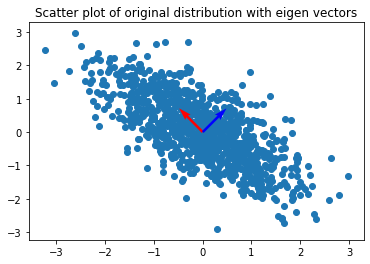

In [23]:
#Step-14 Scatter plot of original distribution with eigen vectors
plt.scatter(X[0,:],X[1,:])
origin = [0], [0] # origin point
Eigen_vector1 = np.asarray(W1).reshape(-1)
Eigen_vector2 = np.asarray(W2).reshape(-1)
plt.quiver(*origin, Eigen_vector1,Eigen_vector2, color=['r','b','g'], scale=10)
plt.title('Scatter plot of original distribution with eigen vectors')
plt.show()

In [24]:
print("First Eigen Value lamda1:", lamda1)
print("First Eigen Vector W1:",np.asarray(W1).reshape(-1))
print("Second Eigen Value lamda2:", lamda2)
print("Second Eigen Vector W2:",np.asarray(W2).reshape(-1))  

First Eigen Value lamda1: 1658.5883302530417
First Eigen Vector W1: [-0.70593254  0.70827907]
Second Eigen Value lamda2: 290.39265536906106
Second Eigen Vector W2: [0.7082779  0.70593372]


# P4: Eigenvectors for Two-Notes:

In [25]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt


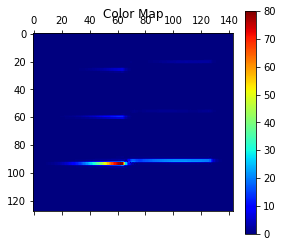

In [26]:
data = loadmat('flute.mat')
X = data.get("X")

#Point-1 Plotting colorMap
plt.matshow(X, cmap=plt.cm.jet)
plt.title('Color Map')
plt.colorbar()
plt.show()

In [27]:
X.shape

(128, 143)

In [28]:
#Step-2 finding first eigen vector
W1 = np.asmatrix(np.random.normal(0, 1, 128)).T
W1 =  W1/np.linalg.norm(W1)
z1 = np.matmul(W1.T,X)
lamda1 =np.matmul(z1,z1.T).item()
delta=pow(10,2)
while delta >= pow(10,-10):
    #S Derivative of Lamda1 w.r.t W1
    # Need to write formulae of derivatibe in markdown
    lamda1_Deriv = 2*np.matmul(np.matmul(X,X.T),W1)

    #update your parameter.
    alpha = 0.0001
    W1 = W1 + alpha*lamda1_Deriv

    # normalization
    W1 =  W1/np.linalg.norm(W1)
    
    z1 = np.matmul(W1.T,X)
    delta = np.abs(np.matmul(z1,z1.T).item()-lamda1)
    lamda1 = np.matmul(z1,z1.T).item()
print("First Eigen Value lamda1:", lamda1)
print("Shape of First Eigen Vector:", W1.shape) 

First Eigen Value lamda1: 188655.48030138994
Shape of First Eigen Vector: (128, 1)


In [29]:
#subtracting the contribution of the firrst eigenvector from X
s1 =np.linalg.norm(np.matmul(W1.T,X))
u1 = np.matmul(X.T,W1)/s1
X_revised = X-np.asarray(np.matmul(np.matmul(W1,np.asmatrix(s1)),u1.T))

In [30]:
# finding second eigen vector
W2 = np.asmatrix(np.random.normal(0, 1, 128)).T
W2 =  W2/np.linalg.norm(W2)
z2 = np.matmul(W2.T,X_revised)
lamda2 =np.matmul(z2,z2.T).item()
delta=pow(10,2)
while delta >= pow(10,-10):
    # Derivative of Lamda2 w.r.t W2
    # Need to write formulae of derivatibe in markdown
    lamda2_Deriv = 2*np.matmul(np.matmul(X_revised,X_revised.T),W2)

    # update your parameter.
    alpha = 0.0001
    W2 = W2 + alpha*lamda2_Deriv

    # normalization
    #print("L2-Norm of W2 after Normalization")
    W2 =  W2/np.linalg.norm(W2)
    
    z2 = np.matmul(W2.T,X_revised)
    delta = np.abs(np.matmul(z2,z2.T).item()-lamda2)
    lamda2 = np.matmul(z2,z2.T).item()
print("Second Eigen Value lamda2:", lamda2)   
print("Shape of Second Eigen Vector:", W2.shape) 

Second Eigen Value lamda2: 43797.07037080819
Shape of Second Eigen Vector: (128, 1)


In [31]:
#W is Eigen_Vectors
W = np.column_stack((W1,W2))

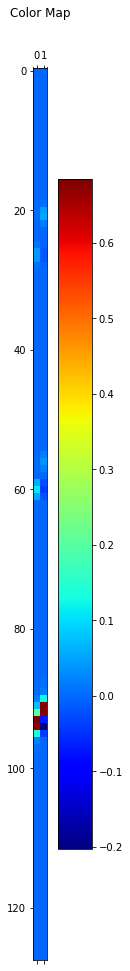

In [32]:
# Color map of combined Eigen Vectors 
plt.matshow(W, cmap='jet')
plt.title('Color Map')
plt.colorbar()
plt.show()

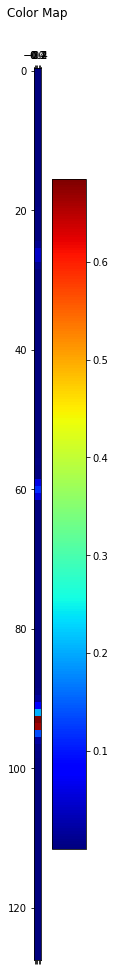

In [33]:
# Color map of First Eigen Vector 
plt.matshow(W1, cmap='jet')
plt.title('Color Map')
plt.colorbar()
plt.show()

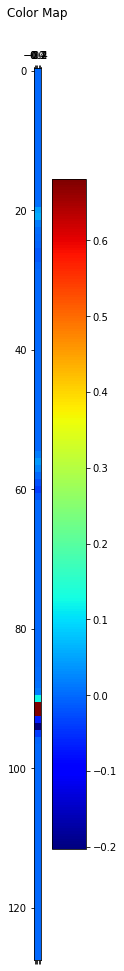

In [34]:
# Color map of Second Eigen Vector 
plt.matshow(W2, cmap='jet')
plt.title('Color Map')
plt.colorbar()
plt.show()

$$ X = WSU^{T} 
 = W(T_A) $$
T_A --> Temporal Activations
$$T_A = W^{T}X$$

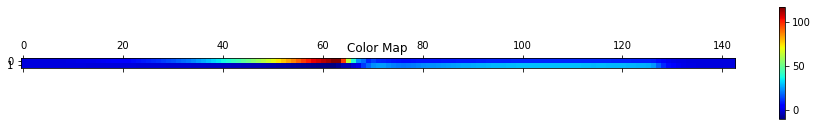

In [35]:
# Point-3 Recover their temporal activations?
T_A = np.matmul(W.T,X)
plt.matshow(T_A, cmap='jet')
plt.title('Color Map')
plt.colorbar()
plt.show()

#### Point-4 Recover the notes

First note can be recovered by using first eigen vector and first row of Temporal activation and similarly second note by using second eigen vector and second row of Temporal activation.

$$ First Note = W1*TA1 $$
$$ Second Note = W2*TA2 $$

In [36]:
First_note = np.matmul(W1,T_A[0])
First_note.shape

(128, 143)

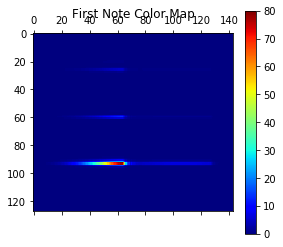

In [37]:
# Plotting colorMap of FirstNote
plt.matshow(First_note, cmap=plt.cm.jet)
plt.title('First Note Color Map')
plt.colorbar()
plt.show()

In [38]:
Second_note = np.matmul(W2,T_A[1])
Second_note.shape

(128, 143)

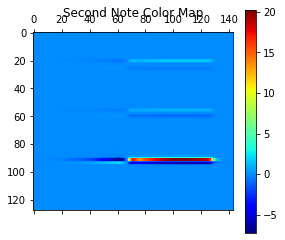

In [39]:
# Plotting colorMap of FirstNote
plt.matshow(Second_note, cmap=plt.cm.jet)
plt.title('Second Note Color Map')
plt.colorbar()
plt.show()